# Moire patterns

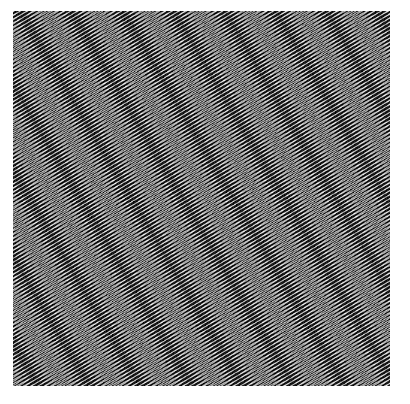

<a href="https://en.wikipedia.org/wiki/Moir%C3%A9_pattern">Moiré patterns</a>&nbsp;are interference patterns that are created by overlaying two patterns.<br>

Before starting execute the following cell:

In [2]:
from py5canvas import *

#### __1) Create the line pattern function__
We will start by creating a function that we will use to create moire patters:

In [3]:
def line_sequence(x0, x1, spacing, height):
    x = x0
    while x < x1:
        line(x, -height, x, height)
        x += spacing
    

This function will draw a series of vertical lines spaced horizontally between the position `x0` and the position `x1` and with a distance `spacing` between each line. Each line has vertical end points `-height` and `height`. We use a `while` loop instead of a `for` loop in this case, because we do not know how many lines to draw and we want this to depend on the distance between `x0` and `x1`. The loop will continue until the variable `x` is greater or equal to `x1`, that is it will continue while `x < x1`.

Let's test the function in a canvas:

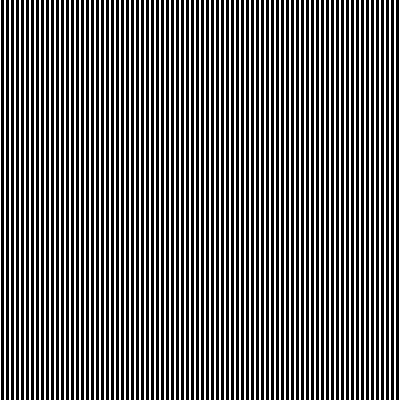

In [13]:
create_canvas(400, 400)
background(0)
no_fill()
stroke(255)
translate(width/2, height/2)
line_sequence(-width, width, 5, height)
show()

 
#### __2) Create moire pattern__
We will define two variables `rot1` and `rot2` that define the rotations of two overlapping line patterns. This will create the moire effect. Then we will use push and pop matrix to rotate the two patterns differently:

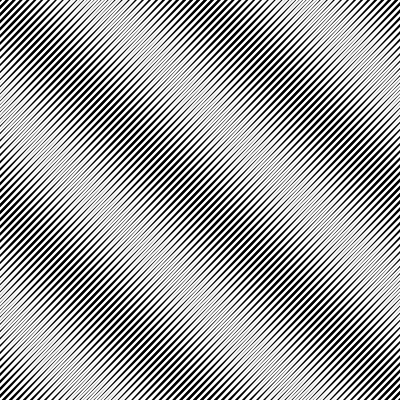

In [19]:
rot1 = 43
rot2 = 45
background(0)
no_fill()
stroke(255)

translate(width/2, height/2)
stroke_weight(2)
with push_matrix():
    rotate(radians(rot1))
    line_sequence(-width, width, 5, height)
with push_matrix():
    rotate(radians(rot2))
    line_sequence(-width, width, 5, height)
show()

We used the 
```python
with push_matrix():
    ...
```
syntax here, as it makes the code more readable and it requires you to use indentation.

#### __3) Move the code to an interactive sketch__

This is not much fun unless we can animate the pattern, which is not possible in a notebook. To do so we will move the code to an interactive sketch. Firstly, create a new file called "moire.py".

At the beginning of the file add 
```python
from py5canvas import *
```

followed by the definition of the function `line_sequence`.

Then create a `setup` and `draw` functions where:
```python
def setup():
    create_canvas(400, 400)
    frame_rate(60)
```
and the `draw` function that contains the drawing code we used above, **but without `show()`**.
```python
def draw():
    # Your code goes here, indented
```

Finally add 
```python
run()
```
at the very end of your script.

If you run the script you should see the same output as you see in the notebook.

#### __4) Animate__
Finally let's add an animation. We have two ways of doing this. 

The simplest (and perhaps best) way is to set `rot1` and `rot2` to the property `frame_count` multiplied by some value, e.g.
```python
rot1 = -frame_count*0.8
rot2 = frame_count
```
Alternatively, we can move the `rot1` and `rot2` variables to *outside* of the `draw()` function and then inside the draw function:

- First, at the beginning of `draw` declare that `rot1` and `rot2` are globals with `global rot1, rot2`
    - This tells Python that we are going to modify these global variables at each frame, which will result in animation.
- Second, increment the variables at the end of the draw function. E.g. `rot1 += 0.5` and `rot2 += -0.9`.



#### __4) Modify and play at home!__

What else could you do? 

- Try to create different patterns, drawing inspiration from [wikipedia](https://en.wikipedia.org/wiki/Moiré_pattern)
- Try different line widths, spacing, rotation
- Try using the pattern as a mask for different shapes/drawings
